In [1]:
import matplotlib.pyplot as plt
import numpy as np
try:
    from cirq_qubitization.and_gate import And
    from cirq_qubitization.t_complexity_protocol import t_complexity
except:
    import os
    os.chdir('..')
    from cirq_qubitization.and_gate import And
    from cirq_qubitization.t_complexity_protocol import t_complexity

## Two Qubit And Gate

In [2]:
# And of two qubits
gate = And() # create an And gate
# create an operation
operation = gate.on_registers(**gate.registers.get_named_qubits()) 
# this operation doesn't directly support TComplexity but it's decomposable and its components are simple.
print(t_complexity(operation))

TComplexity(t=4, clifford=9, rotations=0)


## Adjoint of two qubit And gate

In [3]:
gate = And() ** -1 # adjoint of And
operation = gate.on_registers(**gate.registers.get_named_qubits()) 
# the deomposition is H, measure, CZ, and Reset
print(t_complexity(operation))

TComplexity(t=0, clifford=4, rotations=0)


## And gate on n qubits

In [4]:
n = 5
gate = And((1, )*n)
operation = gate.on_registers(**gate.registers.get_named_qubits()) 
print(t_complexity(operation))

TComplexity(t=16, clifford=36, rotations=0)


In [9]:
def Generate(n_max: int = 10):
    """Returns the #T when the number of qubits is between 2 and n_max inclusive"""
    n_controls = []
    t_count = []
    for n in range(2, n_max + 2):
        n_controls.append(n)
        gate = And(cv=(1, )*n)
        op = gate.on_registers(**gate.registers.get_named_qubits()) 
        c = t_complexity(op)
        t_count.append(c.t)
    return n_controls, t_count

In [10]:
n_controls, t_count = Generate()
plt.plot(n_controls, t_count, label='T')

In [11]:
plt.ylabel('count')
plt.xlabel('number of qubits')
plt.title('And gate')
plt.legend()

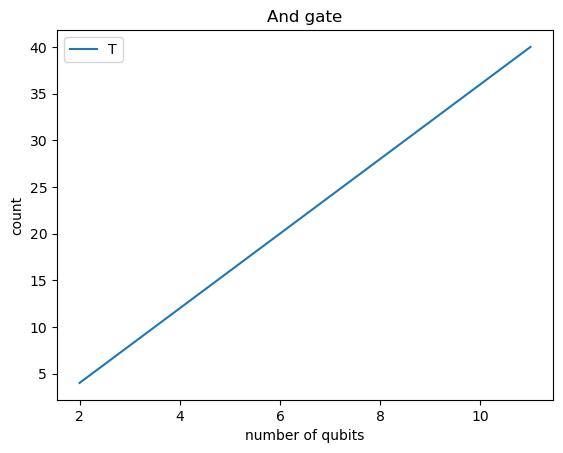

In [12]:
plt.show()